In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pypfopt

In [11]:
tickers = ["BLK", "BAC", "AAPL", "TM", "WMT",
           "JD", "INTU", "MA", "UL", "CVS",
           "DIS", "AMD", "NVDA", "PBI", "TGT"]

ohlc = yf.download(tickers, period="max")
prices = ohlc["Adj Close"]
prices.tail(5)

[*********************100%***********************]  15 of 15 completed


,AAPL,AMD,BAC,BLK,CVS,DIS,INTU,JD,MA,NVDA,PBI,TGT,TM,UL,WMT
Date,,,,,,,,,,,,,,,
2021-02-22,126.000000,85.370003,35.150002,703.140015,70.480003,191.759995,401.549988,97.660004,340.660004,574.229980,8.23,188.990005,152.440002,53.795528,137.690002
2021-02-23,125.860001,84.739998,35.520000,703.159973,69.639999,197.089996,399.089996,99.470001,350.420013,565.679993,8.61,186.360001,152.729996,54.895008,135.470001
2021-02-24,125.349998,86.940002,36.380001,712.099976,70.400002,197.509995,413.179993,96.370003,367.320007,579.960022,9.16,187.080002,152.449997,53.745998,133.210007
2021-02-25,120.989998,82.419998,35.930000,694.789978,69.330002,190.979996,387.980011,93.360001,354.570007,532.299988,8.86,185.080002,149.259995,53.810001,131.949997
2021-02-26,121.260002,84.510002,34.709999,694.500000,68.129997,189.039993,390.140015,93.870003,353.850006,548.580017,8.48,183.440002,147.929993,52.060001,129.919998


In [12]:
from pypfopt import expected_returns

rets = expected_returns.returns_from_prices(prices)
rets.tail()

,AAPL,AMD,BAC,BLK,CVS,DIS,INTU,JD,MA,NVDA,PBI,TGT,TM,UL,WMT
Date,,,,,,,,,,,,,,,
2021-02-22,-0.029799,-0.046997,0.017661,-0.009815,0.000852,0.044160,-0.023824,-0.079461,0.022481,-0.038237,-0.044135,0.000900,-0.007229,-0.001287,-0.004699
2021-02-23,-0.001111,-0.007380,0.010526,0.000028,-0.011918,0.027795,-0.006126,0.018534,0.028650,-0.014889,0.046173,-0.013916,0.001902,0.020438,-0.016123
2021-02-24,-0.004052,0.025962,0.024212,0.012714,0.010913,0.002131,0.035305,-0.031165,0.048228,0.025244,0.063879,0.003863,-0.001833,-0.020931,-0.016683
2021-02-25,-0.034783,-0.051990,-0.012369,-0.024308,-0.015199,-0.033062,-0.060990,-0.031234,-0.034711,-0.082178,-0.032751,-0.010691,-0.020925,0.001191,-0.009459
2021-02-26,0.002232,0.025358,-0.033955,-0.000417,-0.017309,-0.010158,0.005567,0.005463,-0.002031,0.030584,-0.042889,-0.008861,-0.008911,-0.032522,-0.015385


In [13]:
from pypfopt import HRPOpt

hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

OrderedDict([('AAPL', 0.03922),
             ('AMD', 0.02658),
             ('BAC', 0.04091),
             ('BLK', 0.04222),
             ('CVS', 0.09302),
             ('DIS', 0.06045),
             ('INTU', 0.03645),
             ('JD', 0.05206),
             ('MA', 0.04269),
             ('NVDA', 0.02312),
             ('PBI', 0.0832),
             ('TGT', 0.08742),
             ('TM', 0.10036),
             ('UL', 0.16136),
             ('WMT', 0.11093)])

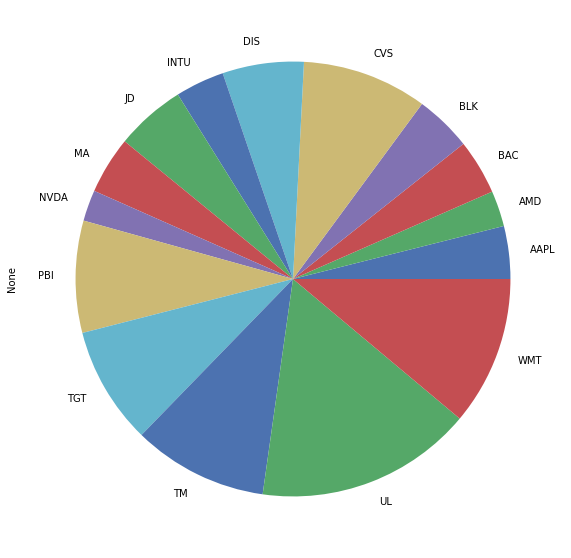

In [18]:
pd.Series(weights).plot.pie(figsize=(10, 10), normalize=False);

Expected annual return: 20.3%
Annual volatility: 19.2%
Sharpe Ratio: 0.96


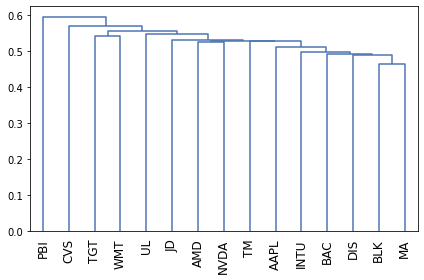

In [17]:
from pypfopt import plotting

hrp.portfolio_performance(verbose=True), plotting.plot_dendrogram(hrp); 